In [1]:
import numpy as np
fish_length = ([25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0])
fish_weight = ([242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9])

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify = fish_target
)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# fit(...) : 데이터 준비, tranform(...) 표준점수 변환 작업, fit_transform(..)

ss = StandardScaler()
ss.fit(train_input) # 표준 점수 기준은 훈련 데이터!

,copy,True
,with_mean,True
,with_std,True


In [13]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [15]:
train_scaled[:5]

array([[ 0.2202789 ,  0.00324979],
       [-1.61916343, -1.35885176],
       [ 0.83342634,  0.94307717],
       [-1.49653394, -1.3507498 ],
       [ 0.7312351 ,  0.47316348]])

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
kn = KNeighborsClassifier()

In [19]:
kn.fit(train_scaled, train_target) # 학습

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [21]:
fish = ss.transform(np.array([[25,150]]))

In [22]:
kn.predict(fish)

array([1.])

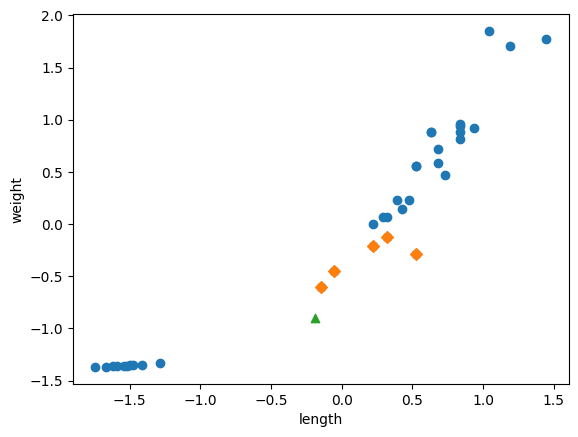

In [24]:
import matplotlib.pyplot as plt
_, indexes = kn.kneighbors(fish)

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.scatter(fish[0][0], fish[0][1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()